In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from sklearn.model_selection import train_test_split
import pickle
from MVDD.MVDD import MVDD
import MVDD.MVDD_Generator as mvGen

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

# Hemo

In [ ]:
#Load original dataframes
hemoData = pd.read_csv('Data/Preprocessed Data/Cluster_Hemo.csv', index_col='DEIDNUM')
allScores = hemoData['Score']
death = hemoData['ScoreDeath']
rehosp = hemoData['ScoreRehosp']
readm = hemoData['ScoreReadmission']
hemoData

In [ ]:
# Preprocess and create training and testing sets
hemo = hemoData.drop('Score', axis=1)
hemo = hemo.drop('ScoreDeath', axis=1)
hemo = hemo.drop('ScoreRehosp', axis=1)
hemo = hemo.drop('ScoreReadmission', axis=1)
hemo = hemo.replace(np.inf, 0)
hemo = hemo.fillna(0)

xData = hemo
yData = allScores
xData.shape, yData.shape

## All Scores Label

In [ ]:
# #Perform Grid search to find best parameter set
# trialParams = {'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 7, 10, 13, 15, 20, 25, 30, None], 
#                'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}

# mvGen.findBestModelParams(xData, yData, trialParams)

In [ ]:
mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Death Label

In [ ]:
yData = death

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Death', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Rehospitalization Label

In [ ]:
yData = rehosp

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Readmission Label

In [ ]:
yData = readm

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

# All Data

In [2]:
#Load original dataframes
allDataOrig = pd.read_csv('Data/Preprocessed Data/Cluster_AllData.csv', index_col='DEIDNUM')
allScores = allDataOrig['Score']
death = allDataOrig['ScoreDeath']
rehosp = allDataOrig['ScoreRehosp']
readm = allDataOrig['ScoreReadmission']

allDataOrig

,Age,Gender,Race,Wt,BMI,InitialHospDays,TotalHospDays,NYHA,MLHFS,AF,...,HR,PV,MAP,PP,PPP,PPRatio,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
DEIDNUM,,,,,,,,,,,,,,,,,,,,,
72,88.0,2.0,1.0,57.100000,26.424175,9.0,16.0,4.0,76.0,1.0,...,104.0,12.452563,139.333333,26.0,0.276596,0.250000,5,4,5,5
72,88.0,2.0,1.0,52.000000,24.064047,9.0,16.0,3.0,76.0,1.0,...,92.0,12.452563,126.000000,26.0,0.302326,0.282609,5,4,5,5
81,69.0,1.0,1.0,102.363636,32.307675,5.0,13.0,4.0,21.0,1.0,...,70.0,-3.346568,125.333333,32.0,0.363636,0.457143,2,5,4,4
81,69.0,1.0,1.0,100.454545,31.705134,5.0,13.0,2.0,21.0,1.0,...,72.0,-3.346568,105.666667,34.0,0.441558,0.472222,2,5,4,4
86,56.0,2.0,2.0,98.636364,40.016375,3.0,3.0,4.0,NaN,0.0,...,86.0,5.478621,146.666667,30.0,0.300000,0.348837,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302,41.0,1.0,2.0,97.400000,40.541103,21.0,21.0,NaN,79.0,0.0,...,75.0,25.535155,130.000000,55.0,0.550000,0.733333,2,5,4,4
99912,46.0,1.0,1.0,78.636364,25.677180,2.0,2.0,4.0,89.0,0.0,...,67.0,-13.911732,174.666667,38.0,0.316667,0.567164,4,1,1,2
99912,46.0,1.0,1.0,78.200000,25.534694,2.0,2.0,3.0,89.0,0.0,...,60.0,-13.911732,140.666667,24.0,0.255319,0.400000,4,1,1,2


In [3]:
# Preprocess and create training and testing sets
allData = allDataOrig.drop('Score', axis=1)
allData = allData.drop('ScoreDeath', axis=1)
allData = allData.drop('ScoreRehosp', axis=1)
allData = allData.drop('ScoreReadmission', axis=1)
allData = allData.replace(np.inf, 0)
allData = allData.fillna(0)

xData = allData
yData = allScores

## All Scores Label

In [4]:
#Perform Grid search to find best parameter set
# trialParams = {'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 7, 10, 13, 15, 20, 25, 30, None], 
#                'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}

# mvGen.findBestModelParams(xData, yData, trialParams)


Total edges: 82 Nonterminal Edge 40
Must have more than 12 and less than 24 OR Edges
Best edge set: ['dashed', 'dashed', 'dashed', 'dashed', 'dashed', 'dashed', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'dashed', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'dashed', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']
Accuracy DT: 0.8160919540229885
Accuracy MVDD: 0.3448275862068966


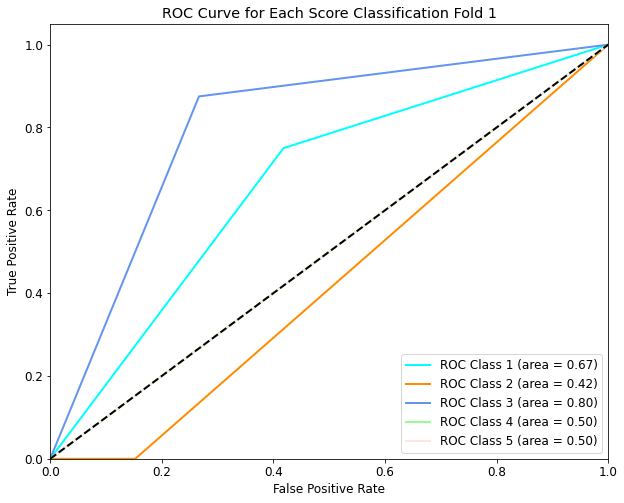


Total edges: 86 Nonterminal Edge 42
Must have more than 13 and less than 25 OR Edges


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-5a126f1bacf8>", line 1, in <module>
    mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"],
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 61, in generateTreeCrossValidation
    dt, mvdd = trainCrossValidation(xData, yData, dt, numFolds, classes, learningCriteria, showIndividualROC, modelName)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 101, in trainCrossValidation
    mvdd = getBestMVDD(dt, X_train, y_train, classes, learningCriteria)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 204, in getBestMVDD
    y_pred = mvdd.predictScoreSet(xData)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD.py", line 89, in predi

TypeError: object of type 'NoneType' has no len()

In [5]:
mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Death Label

In [4]:
yData = death

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_Death', numFolds=5, 
                                        showIndividualROC=True)


Total edges: 92 Nonterminal Edge 45
Must have more than 14 and less than 27 OR Edges


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-ee8ea633a51c>", line 3, in <module>
    mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"],
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 61, in generateTreeCrossValidation
    dt, mvdd = trainCrossValidation(xData, yData, dt, numFolds, classes, learningCriteria, showIndividualROC, modelName)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 101, in trainCrossValidation
    mvdd = getBestMVDD(dt, X_train, y_train, classes, learningCriteria)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 204, in getBestMVDD
    y_pred = mvdd.predictScoreSet(xData)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD.py", line 89, in predi

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Rehospitalization Label

In [ ]:
yData = rehosp

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Readmission Label

In [ ]:
yData = readm

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_WConditions_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(allData.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

In [ ]:
allData.columns

# All Data without condition features

In [ ]:
# Remove condition columns
remCols= ['AF', 'AlchE', 'ANGP', 'ARRH',
       'CARREST', 'CVD', 'COPD', 'DEPR', 'DIAB', 'GOUT', 'HEPT', 'HTN',
       'MALIG', 'RENAL', 'SMOKING', 'STERD', 'StrokeTIA', 'VAHD', 'VF', 'VHD',
       'VT', 'ISCH', 'NonISCH', 'CABG', 'HTRANS', 'ICD', 'PACE', 'PTCI']

for r in remCols: 
    allData = allData.drop(r, axis=1)


xData = allData
yData = allScores

xData

## All Scores Label

In [ ]:
# #Perform Grid search to find best parameter set
# trialParams = {'criterion': ('gini', 'entropy'), 'max_depth': [3, 5, 7, 10, 13, 15, 20, 25, 30, None], 
#                'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}

# mvGen.findBestModelParams(xData, yData, trialParams)

In [ ]:
mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Death Label

In [ ]:
yData = death

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_Death', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Rehospitalization Label

In [ ]:
yData = rehosp

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Readmission Label

In [ ]:
yData = readm

mvdd= mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='entropy', maxLevels=None, minSamplesPerLeaf=10, 
                                        modelName='AllData_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)